# {정형_시계열_제목} 경진대회 베이스라인

## 1. 분석 환경 준비
### 1.1. 데이터 불러오기
먼저 분석하려는 데이터를 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를

데이터프레임이라고 하는 형식으로 편하게 다루도록 해주는 라이브러리입니다.

In [1]:
import pandas as pd ## pandas 라이브러리를 가져오기 위하여 import를 해줍니다.

# csv 형식으로 된 데이터 파일을 읽어옵니다.
df = pd.read_csv('data/train.csv', encoding = 'CP949')

print(f'train set은 {df.shape[1]} 개의 feature를 가진 {df.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')

# 데이터의 최상단 5 줄을 표시합니다.
df.head()

train set은 10 개의 feature를 가진 122400 개의 데이터 샘플로 이루어져 있습니다.


,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


## 2. 데이터 살펴보기

### 2.1. 결측치 확인
결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

In [2]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 존재하지 않습니다


## 3. 데이터 처리
### 3.1. {결측치 처리}

원활한 분석을 위해 적절하게 결측치들을 처리해 줍시다.

In [3]:
# 결측치가 있는 row들을 확인합니다.
df[df.isna().sum(axis=1) > 0]

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유


카테고리형 데이터에 대해서는 행을 삭제하고

수치형 데이터에 대해서는 평균값을 채워주겠습니다.

In [4]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 카테고리형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # 수치형 feature가 결측치인 경우 평균값을 채워주었습니다.
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp

df = handle_na(df, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(df) 

결측치가 존재하지 않습니다


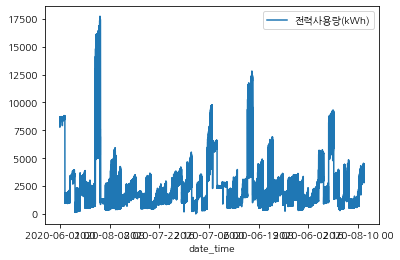

In [5]:
import os
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") #폰트설정
plt.rc("axes", unicode_minus = False)

series = df[['date_time', '전력사용량(kWh)']].set_index('date_time')
series.plot()
plt.rcParams["figure.figsize"] = (15,8)
plt.show()


현실에 존재하는 시계열자료는 불안정(Non-stationary)한 경우가 많습니다.    
따라서 모형 그 자체에 이러한 비정상성을 제거하는 과정을 포함한것이 ARIMA모형이며 

ARIMA(p 자기회귀, d 누적(차분횟수), q 이동평균)로 표현

/home/ubuntu/anaconda3/envs/world/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


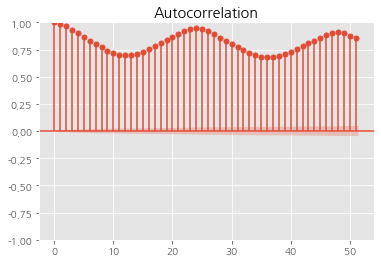

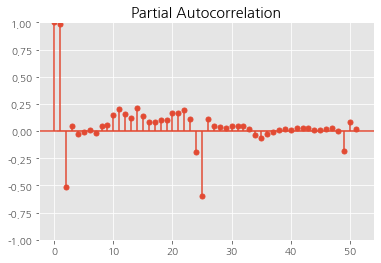

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series) ##Lag에 따른 관측치들 사이의 관련성을 측정하는 함수
#MA특성 띄는 경우 급격히 감소

plot_pacf(series) ##k이외의 모든 다른 시점 관측치의 영향력을 배제하고yt와 yt-k 두 관측치의 관련성을 측정하는 함수
#AR특성 띄는 경우 급격히 감소

plt.rc("font", family="NanumGothic")
plt.show()

ACF를 보면 급격히 감소하지 않음  
또한 PACF는 1의 Time lag에서 약 0.9를 보이고 이후에 급격히 감소한다. 따라서 p=0, q=1이 적당하다고 추측

차분 차수의 계산을 위해 우선 1차 차분을 하고, ACF 및 PACF를 다시 계산